In [6]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [7]:
# Parameters
sample_rate = 44100  # Sample rate (Hz)
duration = 1.0  # Duration of the audio (seconds)
frequency = 440.0  # Base frequency of the source signal (Hz)
num_harmonics = 10  # Number of harmonics to generate
num_comb_filters = 4  # Number of comb filters in the stack
comb_delay = [0.01, 0.02, 0.04, 0.08]  # Delay lengths of the comb filters (seconds)
comb_gain = [0.8, 0.6, 0.4, 0.3]  # Gains of the comb filters

In [8]:
# Create time axis
t = np.arange(0, duration, 1 / sample_rate)

# Generate source signal using additive synthesis
source_signal = np.zeros_like(t)
for harmonic in range(1, num_harmonics + 1):
    source_signal += np.sin(2 * np.pi * harmonic * frequency * t)

# Save the source signal as an audio file
sf.write("source.wav", source_signal, sample_rate)

In [9]:
# Initialize the mixed signal as the source signal
mixed_signal = source_signal.copy()

# Apply the stack of comb filters
for i in range(num_comb_filters):
    delay_samples = int(comb_delay[i] * sample_rate)
    comb_filter = np.zeros_like(source_signal)
    comb_filter[delay_samples:] = comb_gain[i] * mixed_signal[:-delay_samples]
    mixed_signal += comb_filter

# Normalize the mixed signal
mixed_signal /= np.max(np.abs(mixed_signal))

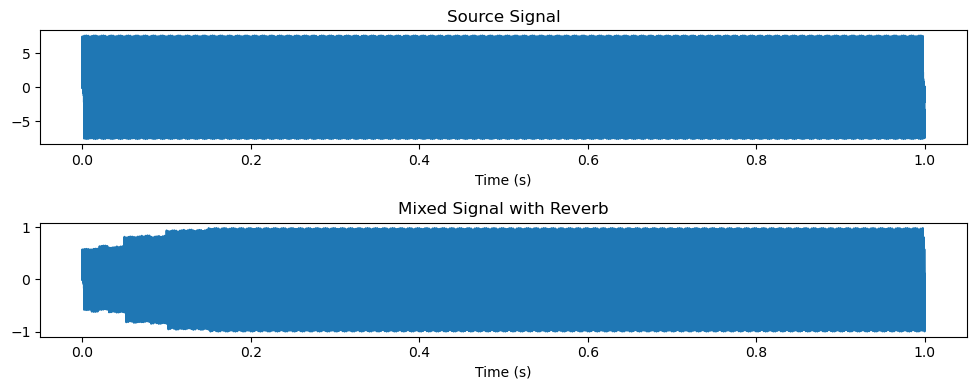

In [10]:
# Save the mixed signal as an audio file
sf.write("output.wav", mixed_signal, sample_rate)

# Plot the source signal and mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, source_signal)
plt.title("Source Signal")
plt.xlabel("Time (s)")
plt.subplot(2, 1, 2)
plt.plot(t, mixed_signal)
plt.title("Mixed Signal with Reverb")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()
